In [582]:
import pandas as pd

In [583]:
df = pd.read_csv('project1.csv')

In [584]:
#Identify shape, size of the raw data (1 point)
#shape of data: (386, 10).
#size of data: 26K.
#-rw-r--r-- 1 root root 26K Feb 18 22:24 project1.csv.

In [585]:
df.shape

(386, 10)

In [586]:
#Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)
#changed most variables to 'category' type, irradiat needs to be bool because it only takes yes and no.
#checked for duplicate rows and columns.

In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [588]:
df['class'] = df['class'].astype("category")
df['age'] = df['age'].astype("category")
df['menopause'] = df['menopause'].astype("category")
df['tumor-size'] = df['tumor-size'].astype("category")
df['inv-nodes'] = df['inv-nodes'].astype("category")
df['node-caps'] = df['node-caps'].astype("category")
df['breast'] = df['breast'].astype("category")
df['breast-quad'] = df['breast-quad'].astype("category")
df['irradiat'] = df['irradiat'].astype("category")

In [589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        386 non-null    category
 1   age          386 non-null    category
 2   menopause    386 non-null    category
 3   tumor-size   385 non-null    category
 4   inv-nodes    385 non-null    category
 5   node-caps    386 non-null    category
 6   deg-malig    386 non-null    int64   
 7   breast       386 non-null    category
 8   breast-quad  386 non-null    category
 9   irradiat     386 non-null    category
dtypes: category(9), int64(1)
memory usage: 8.5 KB


In [590]:
df.duplicated().sum()

11

In [591]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [592]:
df.duplicated().sum()

0

In [593]:
#Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)
#missing data groups: inv-nodes & tumor-size.
#grouped by 'deg-malig' because it is most related to tumor size and lymph node involvment.

In [594]:
df.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [595]:
df['tumor-size'] = df.groupby(['deg-malig'])['tumor-size'].transform(lambda x: x.fillna(x.mode()[0]))
df['inv-nodes'] = df.groupby(['deg-malig'])['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))

In [596]:
df.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [597]:
#Visualize the dataset through different univariate analysis and comment on your observations (2)
#through my univariate analysis:
#age: most of the participants are middle aged.
#tumor-size: patients are diagnosed when the tumor is middle ranged size.
#inv-nodes: large proportion of patients have low involvment of spread to lymph nodes.
#deg-malig: most of the data have higher frequency with a grade 2 tumor.
#menopause: breast cancer incidence increases after menopause.

In [598]:
df.describe()

,deg-malig
count,375.000000
mean,2.074667
std,0.752730
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [599]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='deg-malig', ylabel='Count'>

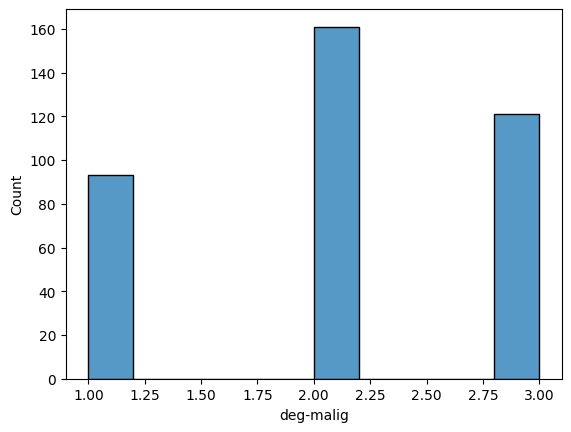

In [600]:
sns.histplot(data=df['deg-malig'])

<function matplotlib.pyplot.show(close=None, block=None)>

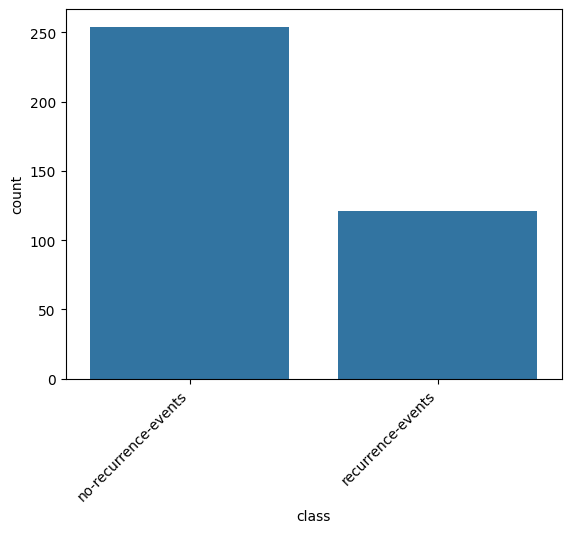

In [601]:
sns.countplot(x=df['class'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

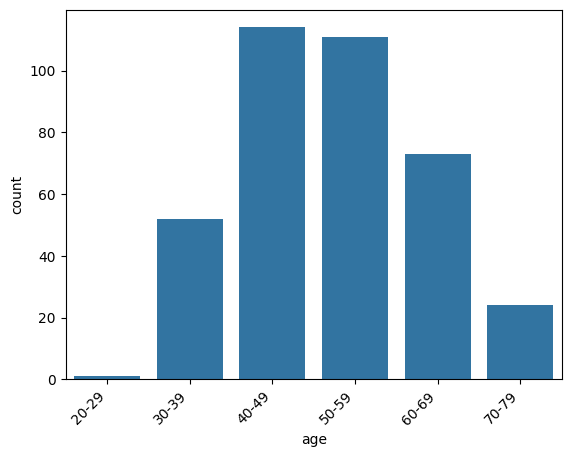

In [602]:
sns.countplot(x=df['age'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

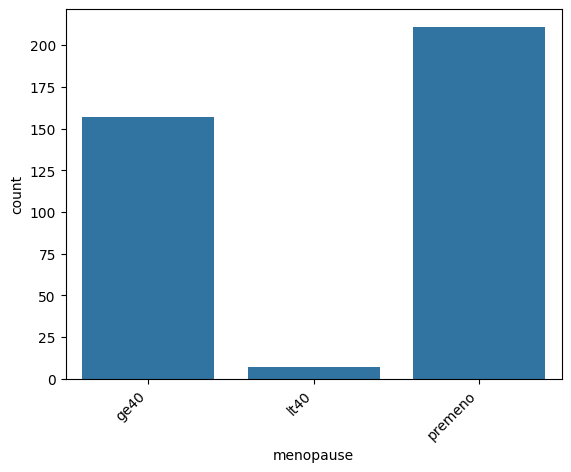

In [603]:
sns.countplot(x=df['menopause'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

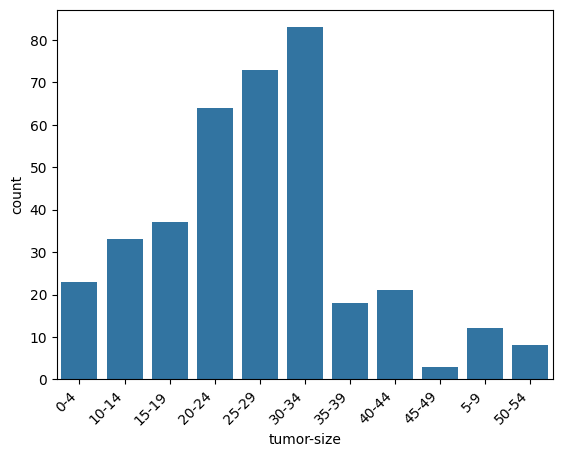

In [604]:
sns.countplot(x=df['tumor-size'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

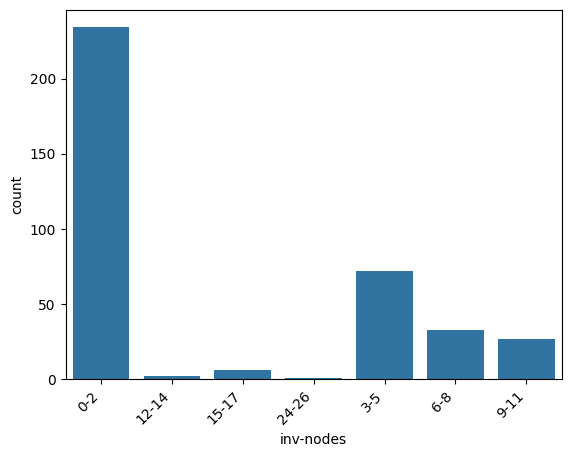

In [605]:
sns.countplot(x=df['inv-nodes'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

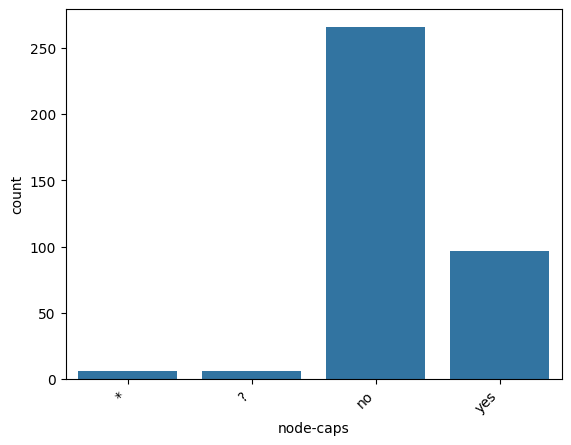

In [606]:
sns.countplot(x=df['node-caps'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

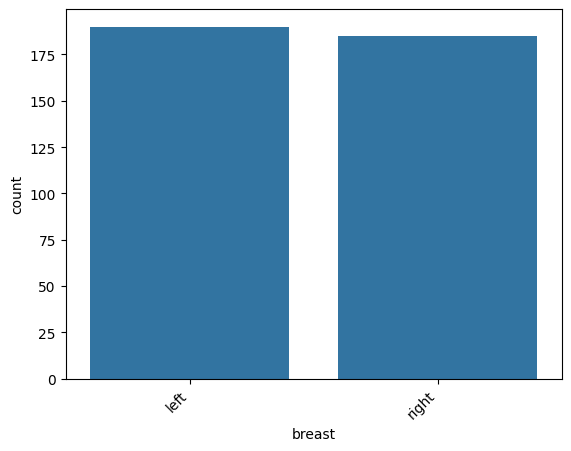

In [607]:
sns.countplot(x=df['breast'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

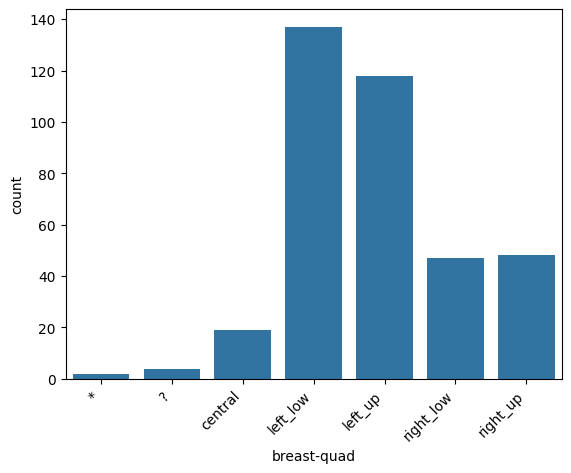

In [608]:
sns.countplot(x=df['breast-quad'])
plt.xticks(rotation=45, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

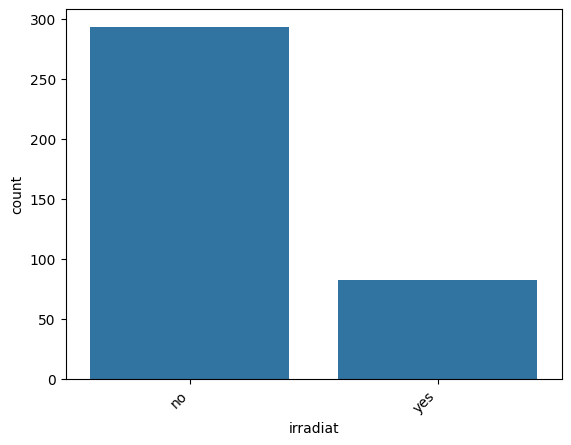

In [609]:
sns.countplot(x=df['irradiat'])
plt.xticks(rotation=45, ha='right')
plt.show

In [610]:
#Perform one-hot encoding on categorical variables (1 point)

In [611]:
df = pd.get_dummies(df, columns=["class"], drop_first=True)
df = pd.get_dummies(df, columns=["age"], drop_first=True)
df = pd.get_dummies(df, columns=["menopause"], drop_first=True)
df = pd.get_dummies(df, columns=["tumor-size"], drop_first=True)
df = pd.get_dummies(df, columns=["inv-nodes"], drop_first=True)
df = pd.get_dummies(df, columns=["node-caps"], drop_first=True)
df = pd.get_dummies(df, columns=["breast"], drop_first=True)
df = pd.get_dummies(df, columns=["breast-quad"], drop_first=True)
df = pd.get_dummies(df, columns=["irradiat"], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                375 non-null    int64
 1   class_recurrence-events  375 non-null    bool 
 2   age_30-39                375 non-null    bool 
 3   age_40-49                375 non-null    bool 
 4   age_50-59                375 non-null    bool 
 5   age_60-69                375 non-null    bool 
 6   age_70-79                375 non-null    bool 
 7   menopause_lt40           375 non-null    bool 
 8   menopause_premeno        375 non-null    bool 
 9   tumor-size_10-14         375 non-null    bool 
 10  tumor-size_15-19         375 non-null    bool 
 11  tumor-size_20-24         375 non-null    bool 
 12  tumor-size_25-29         375 non-null    bool 
 13  tumor-size_30-34         375 non-null    bool 
 14  tumor-size_35-39         375 non-null    bool 
 15  tumor-

In [612]:
#Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

In [613]:
from sklearn.model_selection import train_test_split
X = df.drop('class_recurrence-events', axis=1)
y = df['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [614]:
X_train.shape

(262, 35)

In [615]:
X_test.shape

(113, 35)

In [616]:
#Perform classification using (6 points)

In [617]:
#K-Nearest Neighbor Classifier

In [618]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [619]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))
accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.62
Accuracy of knn on train data is : 0.79


In [620]:
import numpy as np
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_


{'n_neighbors': 44}

In [621]:
best_knn = knn_gscv.best_estimator_
accuracy_test=accuracy_score(y_test, best_knn.predict(X_test))
print(f"Accuracy on the test data set for the model produced with the optimal k is: {accuracy_test}")

accuracy_train=accuracy_score(y_train, best_knn.predict(X_train))
print('Accuracy of on train data for the model produced with the optimal k is: {:.2}'.format(accuracy_train))

Accuracy on the test data set for the model produced with the optimal k is: 0.672566371681416
Accuracy of on train data for the model produced with the optimal k is: 0.67


In [622]:
#K-Nearest Neighbor Classifier using Grid search CV

In [623]:
knn_search_recall = KNeighborsClassifier()
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")
knn_gscv2.fit(X_train, y_train)
knn_gscv2.best_params_

{'n_neighbors': 1}

In [624]:
best_recall = knn_gscv2.best_estimator_

In [625]:
models = [knn, best_knn, best_recall]
for m in models:
    # Recall
    # on test data
    recall_test=recall_score(y_test, m.predict(X_test))
    print(f'Recall of {m} on test data is : {recall_test}')
    # on training data
    recall_train=recall_score(y_train, m.predict(X_train))
    print(f'Recall of {m} on train data is : {recall_train}')

Recall of KNeighborsClassifier(n_neighbors=3) on test data is : 0.25
Recall of KNeighborsClassifier(n_neighbors=3) on train data is : 0.5529411764705883
Recall of KNeighborsClassifier(n_neighbors=44) on test data is : 0.0
Recall of KNeighborsClassifier(n_neighbors=44) on train data is : 0.011764705882352941
Recall of KNeighborsClassifier(n_neighbors=1) on test data is : 0.3333333333333333
Recall of KNeighborsClassifier(n_neighbors=1) on train data is : 0.9882352941176471


In [626]:
knn.predict(X_test.iloc[0:10])

array([False, False, False, False, False, False,  True, False,  True,
       False])

In [627]:
knn.predict_proba(X_test.iloc[0:10])


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

In [628]:
def modified_predict(y_probs, threshold):
    """
    Returns modified predictions for a collection of raw probabilities, `y_probs`
    given a decision threshold, `threshold`.
    """
    result = []
    # iterate over the raw probabilities
    for y in y_probs:
        # compare each one to the threshold
        if y >= threshold:
            result.append(1)
        else:
            result.append(0)
    return result

In [629]:
y_probs = knn.predict_proba(X_test)[0:10,1]
modified_predict(y_probs, 0.3)

[0, 0, 0, 1, 0, 0, 1, 1, 1, 1]

In [630]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_for_threshold(X, y, model, threshold):
    # first, get the raw scores
    y_probs = model.predict_proba(X)[:,1]
    # then, get the modified labels
    y_modified_pred = modified_predict(y_probs, threshold)
    # print a simple confusion matrix as a pandas dataframe so that
    # we can label the rows and columns
    print(pd.DataFrame(confusion_matrix(y, y_modified_pred),
                    columns=['Predicted_False', 'Predicted_True'],
                    index=['Actual_False', 'Actual_True']))

In [631]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.5)

              Predicted_False  Predicted_True
Actual_False               61              16
Actual_True                27               9


In [632]:
confusion_matrix_for_threshold(X_test, y_test, knn, 0.3)

              Predicted_False  Predicted_True
Actual_False               27              50
Actual_True                 6              30


In [633]:
models = [knn, knn_gscv.best_estimator_, knn_gscv2.best_estimator_]
thresholds = [0.8, 0.5, 0.3]
for m in models:
    print(f"Model: {m}\n")
    for t in thresholds:
        print(f"threshold: {t}")
        confusion_matrix_for_threshold(X_test, y_test, m, t)

Model: KNeighborsClassifier(n_neighbors=3)

threshold: 0.8
              Predicted_False  Predicted_True
Actual_False               75               2
Actual_True                35               1
threshold: 0.5
              Predicted_False  Predicted_True
Actual_False               61              16
Actual_True                27               9
threshold: 0.3
              Predicted_False  Predicted_True
Actual_False               27              50
Actual_True                 6              30
Model: KNeighborsClassifier(n_neighbors=44)

threshold: 0.8
              Predicted_False  Predicted_True
Actual_False               77               0
Actual_True                36               0
threshold: 0.5
              Predicted_False  Predicted_True
Actual_False               75               2
Actual_True                36               0
threshold: 0.3
              Predicted_False  Predicted_True
Actual_False               45              32
Actual_True                13          

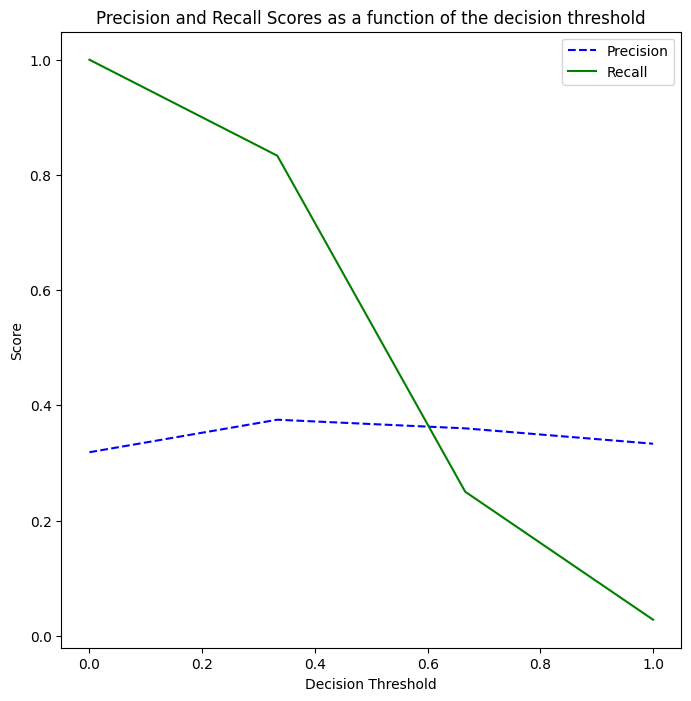

In [634]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

# generate the probabilities on the test set; here we could use any model
y_probs = knn.predict_proba(X_test)[0:,1]

# the precision_recall_curve function from sklearn returns three parameters
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [635]:
#Linear classification

In [636]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [637]:
from sklearn.metrics import accuracy_score
accuracy_test=accuracy_score(y_test, clf.predict(X_test))
accuracy_train=accuracy_score(y_train, clf.predict(X_train))

In [638]:
accuracy_train

0.5343511450381679

In [639]:
accuracy_test

0.4778761061946903

In [640]:
X = df.drop('class_recurrence-events', axis=1)
y = df['class_recurrence-events']

In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

accuracy_test=accuracy_score(y_test, clf.predict(X_test))
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
print(f"Train accuracy: {accuracy_train}; Test accuracy: {accuracy_test}")

Train accuracy: 0.683206106870229; Test accuracy: 0.6902654867256637


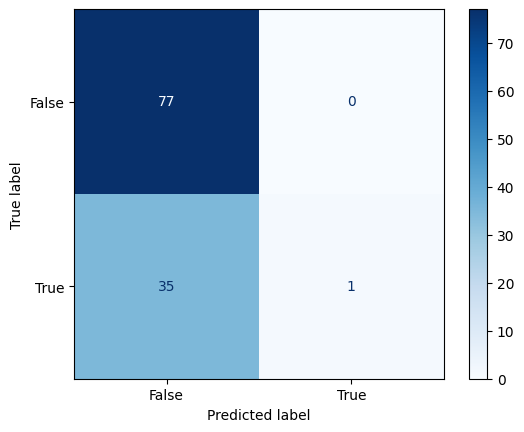

In [642]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,
                                               cmap=plt.cm.Blues,normalize=None)

In [643]:
#Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)
#most important: recall

In [644]:
from sklearn.metrics import classification_report

# Suppose these are your three trained models:
models = {
    "KNN": knn, 
    "KNN Grid Search": best_knn,
    "Linear Classification": clf
}

for model_name, model in models.items():
    print(f"----- {model_name} -----")
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)

----- KNN -----
              precision    recall  f1-score   support

       False       0.69      0.79      0.74        77
        True       0.36      0.25      0.30        36

    accuracy                           0.62       113
   macro avg       0.53      0.52      0.52       113
weighted avg       0.59      0.62      0.60       113

----- KNN Grid Search -----
              precision    recall  f1-score   support

       False       0.68      0.99      0.80        77
        True       0.00      0.00      0.00        36

    accuracy                           0.67       113
   macro avg       0.34      0.49      0.40       113
weighted avg       0.46      0.67      0.55       113

----- Linear Classification -----
              precision    recall  f1-score   support

       False       0.69      1.00      0.81        77
        True       1.00      0.03      0.05        36

    accuracy                           0.69       113
   macro avg       0.84      0.51      0.43       